In [1]:
import pandas as pd

movies_df = pd.read_csv('../data/raw/movies.csv')
ratings_df = pd.read_csv('../data/raw/ratings.csv')

print("Movies DataFrame:")
print(movies_df.head())
print("Ratings DataFrame:")
print(ratings_df.head())
                        

Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [2]:
# Checking for missing values
print("\nMissing Values in Movies DataFrame:")
print(movies_df.isnull().sum())

print("\nMissing Values in Ratings DataFrame:")
print(ratings_df.isnull().sum())


Missing Values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [3]:
# Checking for duplicates
print("\nDuplicate rows in Movies DataFrame:")
print(movies_df.duplicated().sum())

print("\nDuplicated rows in Ratings DataFrame:")
print(ratings_df.duplicated().sum())


Duplicate rows in Movies DataFrame:
0

Duplicated rows in Ratings DataFrame:
0



Ratings Value Counts:
rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64


Matplotlib is building the font cache; this may take a moment.
/var/folders/97/6vmy4w112szg9v0nq70hphs80000gn/T/ipykernel_1383/3160748844.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='viridis')


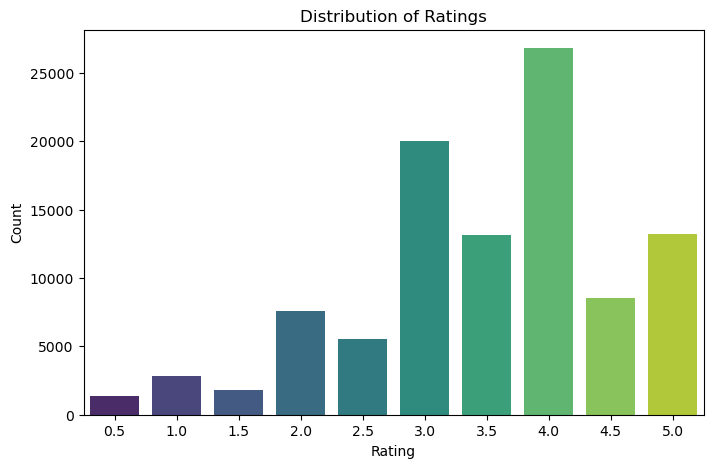

In [6]:
# Understanding ratings distribution
print("\nRatings Value Counts:")
print(ratings_df['rating'].value_counts().sort_index())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [8]:
# New exploration session
import pandas as pd

movies_df = pd.read_csv('../data/raw/movies.csv')
ratings_df = pd.read_csv('../data/raw/ratings.csv')

print("Data Reloaded. Head of Movies:\n", movies_df.head())
print("\nHead of Ratings:\n", ratings_df.head())

Data Reloaded. Head of Movies:
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Head of Ratings:
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [10]:
# Merging Movies and Ratings DataFrames
df = pd.merge(ratings_df, movies_df, on='movieId', how='left')

print("\nMerged DataFrame Head:")
print(df.head())
print("\nMerged DataFrame Info:")
df.info()
print("\nMerged DataFrame Shape:")
print(df.shape)




Merged DataFrame Head:
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1  


Top 10 Most Frequent Genres:
Drama        41928
Comedy       39053
Action       30635
Thriller     26452
Adventure    24161
Romance      18124
Sci-Fi       17243
Crime        16681
Fantasy      11834
Children      9208
Name: count, dtype: int64


/var/folders/97/6vmy4w112szg9v0nq70hphs80000gn/T/ipykernel_1383/1086858765.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=genres_exploded, order=genres_exploded.value_counts().index, palette='magma')


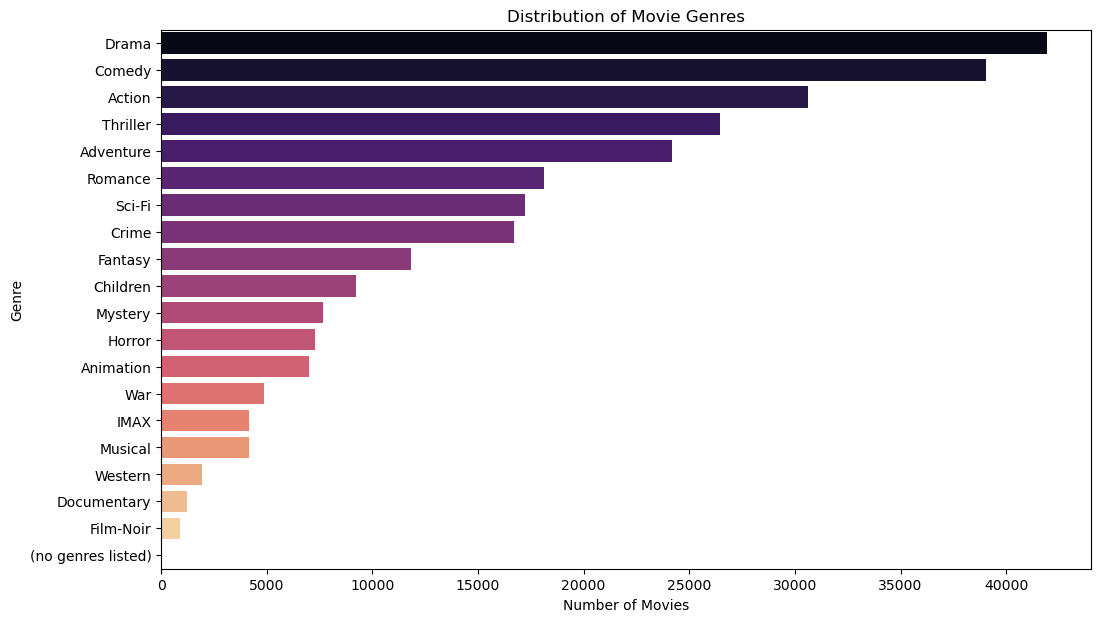

In [11]:
# Exploring Genres

# Exploding genres to get individual genre count
genres_exploded = df['genres'].str.split('|', expand=True).stack()

print("\nTop 10 Most Frequent Genres:")
print(genres_exploded.value_counts().head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.countplot(y=genres_exploded, order=genres_exploded.value_counts().index, palette='magma')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


Ratings per User (Top 10):
userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: rating, dtype: int64

Rating per User (Bottom 10):
userId
53     20
147    20
189    20
194    20
207    20
257    20
278    20
320    20
406    20
431    20
Name: rating, dtype: int64


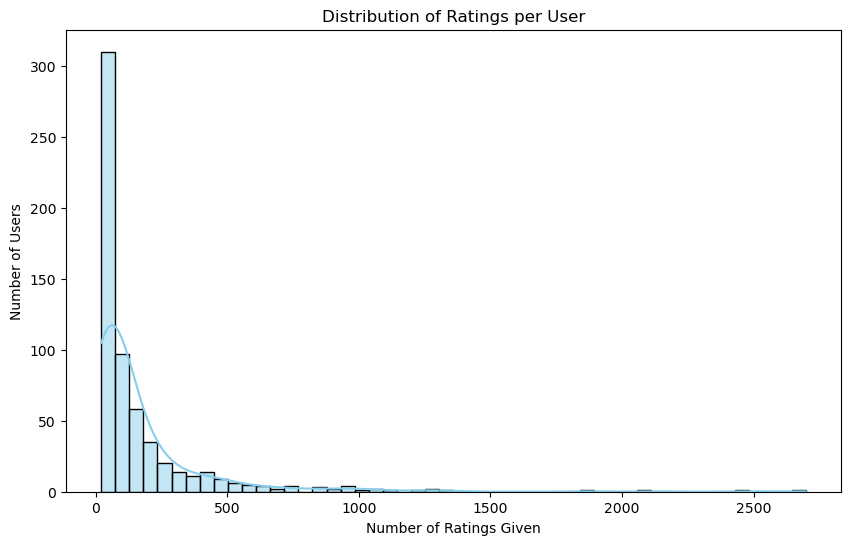

In [14]:
# Understanding user activity (ratings per user)
user_rating_counts = df.groupby('userId')['rating'].count()

print("\nRatings per User (Top 10):")
print(user_rating_counts.nlargest(10))

print("\nRating per User (Bottom 10):")
print(user_rating_counts.nsmallest(10))

plt.figure(figsize=(10, 6))
sns.histplot(user_rating_counts, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings Given')
plt.ylabel('Number of Users')
plt.show()


Most Rated Movies:
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

Least Rated Movies:
title
'71 (2014)                                     1
'Hellboy': The Seeds of Creation (2004)        1
'Salem's Lot (2004)                            1
'Tis the Season for Love (2015)                1
'night Mother (1986)                           1
...All the Marbles (1981)                      1
00 Schneider - Jagd auf Nihil Baxter (1994)    1
1-900 (06) (1994)                              1
10 Years (2011)                       

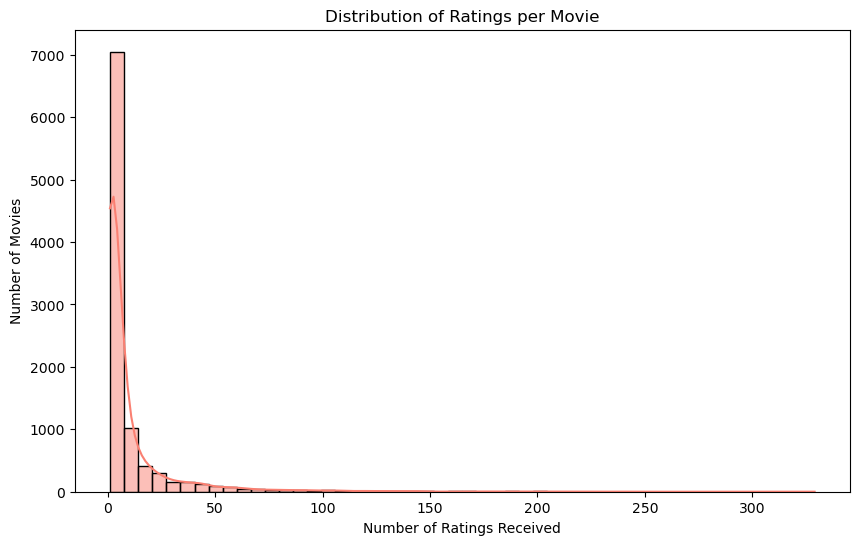

In [15]:
# Understanding movie popularity (ratings per movie)
movie_rating_counts = df.groupby('title')['rating'].count()

print("\nMost Rated Movies:")
print(movie_rating_counts.nlargest(10))

print("\nLeast Rated Movies:")
print(movie_rating_counts.nsmallest(10))

plt.figure(figsize=(10, 6))
sns.histplot(movie_rating_counts, bins=50, kde=True, color='salmon')
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings Received')
plt.ylabel('Number of Movies')
plt.show()